<a href="https://colab.research.google.com/github/Belal-AI/Parking-recommendation-system-Autonomous-Vehicle/blob/main/ML_model_Recommender_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

**Reading the data set for bikes parking we will use it as real data which has the same features we need in our case ,we will replace it through the time from the real time data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv(r"/content/train.csv")
data

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,1003
7256,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,764
7257,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,694
7258,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,712


In [4]:
data.isna().sum()

Id                  0
Date                0
Hour                0
Temperature         0
Humidity            0
Wind_Speed          0
Visibility          0
Dew_Point           0
Solar_Radiation     0
Rainfall            0
Snowfall            0
Season              0
IsHoliday           0
IsFunctioningDay    0
Bikes_Rented        0
dtype: int64

In [5]:
data[['day','month','year']]=data['Date'].str.split('/',expand=True)

In [6]:
data

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented,day,month,year
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254,01,12,2017
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204,01,12,2017
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173,01,12,2017
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107,01,12,2017
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78,01,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,1003,30,11,2018
7256,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,764,30,11,2018
7257,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,694,30,11,2018
7258,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,712,30,11,2018


In [7]:
data.drop('Date',inplace=True,axis=1)

In [8]:
data.drop('Id',inplace=True,axis=1)

In [9]:
data

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented,day,month,year
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254,01,12,2017
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204,01,12,2017
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173,01,12,2017
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107,01,12,2017
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78,01,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,1003,30,11,2018
7256,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,764,30,11,2018
7257,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,694,30,11,2018
7258,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,712,30,11,2018


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hour              7260 non-null   int64  
 1   Temperature       7260 non-null   float64
 2   Humidity          7260 non-null   int64  
 3   Wind_Speed        7260 non-null   float64
 4   Visibility        7260 non-null   int64  
 5   Dew_Point         7260 non-null   float64
 6   Solar_Radiation   7260 non-null   float64
 7   Rainfall          7260 non-null   float64
 8   Snowfall          7260 non-null   float64
 9   Season            7260 non-null   object 
 10  IsHoliday         7260 non-null   int64  
 11  IsFunctioningDay  7260 non-null   int64  
 12  Bikes_Rented      7260 non-null   int64  
 13  day               7260 non-null   object 
 14  month             7260 non-null   object 
 15  year              7260 non-null   object 
dtypes: float64(6), int64(6), object(4)
memory 

In [11]:
data.drop('Bikes_Rented',inplace=True,axis=1)

In [12]:
data.drop('Snowfall',inplace=True,axis=1)

In [13]:
data['day']=np.int64(data['day'])

In [14]:
data['month']=np.int64(data['month'])
data['year']=np.int64(data['year'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hour              7260 non-null   int64  
 1   Temperature       7260 non-null   float64
 2   Humidity          7260 non-null   int64  
 3   Wind_Speed        7260 non-null   float64
 4   Visibility        7260 non-null   int64  
 5   Dew_Point         7260 non-null   float64
 6   Solar_Radiation   7260 non-null   float64
 7   Rainfall          7260 non-null   float64
 8   Season            7260 non-null   object 
 9   IsHoliday         7260 non-null   int64  
 10  IsFunctioningDay  7260 non-null   int64  
 11  day               7260 non-null   int64  
 12  month             7260 non-null   int64  
 13  year              7260 non-null   int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 794.2+ KB


In [16]:
data=pd.get_dummies(data=data)

In [17]:
data

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,IsHoliday,IsFunctioningDay,day,month,year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0,1,1,12,2017,0,0,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0,1,1,12,2017,0,0,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0,1,1,12,2017,0,0,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0,1,1,12,2017,0,0,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0,1,1,12,2017,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0,1,30,11,2018,1,0,0,0
7256,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0,1,30,11,2018,1,0,0,0
7257,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0,1,30,11,2018,1,0,0,0
7258,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0,1,30,11,2018,1,0,0,0


In [18]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=10)
  kmeans.fit(np.array(data))
  wcss.append(kmeans.inertia_)


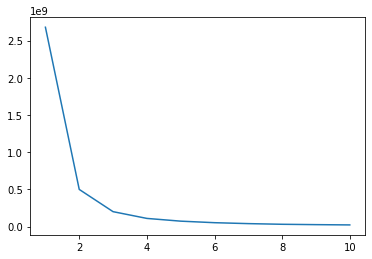

In [19]:
plt.plot(range(1,11),wcss)

In [20]:
kmean_model=KMeans(n_clusters=3,init="k-means++",random_state=10)

In [21]:
kmean_model.fit(np.array(data))

KMeans(n_clusters=3, random_state=10)

In [22]:
target=kmean_model.predict(np.array(data))

In [23]:
target

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [24]:
data['target']=target

In [25]:
data

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,IsHoliday,IsFunctioningDay,day,month,year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,target
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0,1,1,12,2017,0,0,0,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0,1,1,12,2017,0,0,0,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0,1,1,12,2017,0,0,0,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0,1,1,12,2017,0,0,0,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0,1,1,12,2017,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0,1,30,11,2018,1,0,0,0,1
7256,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0,1,30,11,2018,1,0,0,0,1
7257,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0,1,30,11,2018,1,0,0,0,1
7258,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0,1,30,11,2018,1,0,0,0,1


In [26]:
data['target'].unique()

array([1, 0, 2], dtype=int32)

In [27]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


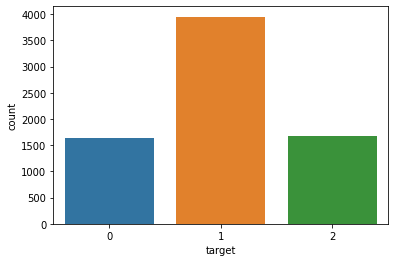

In [28]:
sns.countplot(data['target'])

In [29]:
data.columns[:-1]

Index(['Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point', 'Solar_Radiation', 'Rainfall', 'IsHoliday',
       'IsFunctioningDay', 'day', 'month', 'year', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [30]:
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()

In [31]:
X,y=under.fit_resample(data.iloc[:,:-1],data.iloc[:,-1])

In [32]:
data=pd.DataFrame(data=X,columns=data.columns[:-1])

In [33]:
data['target']=y

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


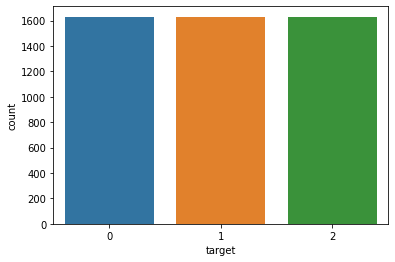

In [34]:
sns.countplot(data['target'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4893 entries, 0 to 4892
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hour              4893 non-null   int64  
 1   Temperature       4893 non-null   float64
 2   Humidity          4893 non-null   int64  
 3   Wind_Speed        4893 non-null   float64
 4   Visibility        4893 non-null   int64  
 5   Dew_Point         4893 non-null   float64
 6   Solar_Radiation   4893 non-null   float64
 7   Rainfall          4893 non-null   float64
 8   IsHoliday         4893 non-null   int64  
 9   IsFunctioningDay  4893 non-null   int64  
 10  day               4893 non-null   int64  
 11  month             4893 non-null   int64  
 12  year              4893 non-null   int64  
 13  Season_Autumn     4893 non-null   uint8  
 14  Season_Spring     4893 non-null   uint8  
 15  Season_Summer     4893 non-null   uint8  
 16  Season_Winter     4893 non-null   uint8  


In [36]:
data

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,IsHoliday,IsFunctioningDay,day,month,year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,target
0,16,1.2,54,4.2,793,-7.0,0.24,0.0,0,1,1,12,2017,0,0,0,1,0
1,1,3.9,69,1.7,485,-1.2,0.00,0.0,0,1,3,12,2017,0,0,0,1,0
2,2,3.3,79,1.4,830,0.0,0.00,0.0,0,1,3,12,2017,0,0,0,1,0
3,6,3.4,86,2.5,278,1.2,0.00,1.0,0,1,3,12,2017,0,0,0,1,0
4,7,3.1,91,1.2,129,1.7,0.00,0.0,0,1,3,12,2017,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,17,-0.2,39,0.8,1016,-12.5,0.00,0.0,0,1,15,12,2017,0,0,0,1,2
4889,4,5.2,74,1.3,1386,0.9,0.00,0.0,0,1,2,11,2018,1,0,0,0,2
4890,13,30.7,59,2.3,1534,21.7,2.67,0.0,0,1,14,7,2018,0,0,1,0,2
4891,19,18.0,74,3.1,1258,13.2,0.02,0.0,0,1,3,4,2018,0,1,0,0,2


In [37]:
import statsmodels.regression.linear_model as sm
columns=data.iloc[:,:-1].columns
sl=.02
def backwardElimintion(X,y,sl,columns,lenfeatures):
  for i in range(len(X)):
    regressor=sm.OLS(y,X).fit()
    maxpvalu=max(regressor.pvalues)
    if(maxpvalu>sl):
      for j in range(len(columns)-1):
        if(regressor.pvalues[j]==maxpvalu):
          X=np.delete(X,j,1)
          columns=np.delete(columns,j)
  return X,columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [107]:
X,columns=backwardElimintion(data.iloc[:,:-1].values,data.iloc[:,-1].values,sl,columns,len(columns))

KeyboardInterrupt: ignored

In [38]:
columns

Index(['Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point', 'Solar_Radiation', 'Rainfall', 'IsHoliday',
       'IsFunctioningDay', 'day', 'month', 'year', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [39]:
data=pd.DataFrame(data=X,columns=columns)

In [40]:
data['target']=y

In [43]:
parms={
    'max_depth':[4,6,8,10,12],
    'min_samples_split':[2,3,6,8,10]
}
modelgrider=DecisionTreeClassifier()

In [44]:
from sklearn.model_selection import GridSearchCV
grider=GridSearchCV(modelgrider,param_grid=parms)

In [45]:
grider.fit(data.iloc[:,:-1],data.iloc[:,-1])

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_split': [2, 3, 6, 8, 10]})

In [46]:
grider.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [47]:
trainX,testX,trainy,testy = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],random_state=42,test_size=0.3)

In [48]:
model1=DecisionTreeClassifier(max_depth=4,min_samples_split=2)

In [49]:
model1.fit(trainX,trainy)

DecisionTreeClassifier(max_depth=4)

In [50]:
ypred=model1.predict(testX)

In [51]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
accuracy_score(testy,ypred)

0.9993188010899182

In [52]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(trainX, trainy)
y_pred = model.predict(testX)

In [53]:
from sklearn.svm import SVC
model5 = SVC(kernel='poly',gamma='auto')
model5.fit(trainX,trainy)


SVC(gamma='auto', kernel='poly')

In [54]:
ypred5=model5.predict(testX)


In [55]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
accuracy_score(testy,ypred5)

0.9993188010899182